In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import plot_tree, export_graphviz
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import torch
from torch import nn

In [57]:
soil_data = pd.read_csv('soil_clean.csv')
soil_data.head(5)

,County,bdod,cec,clay,nitrogen,phh2o,sand,silt,soc
0,adams,132,163,192,698,60,489,319,375
1,ashland,115,249,258,601,51,216,526,605
2,barron,133,150,185,516,55,317,498,677
3,bayfield,111,266,187,545,50,480,333,668
4,brown,134,289,308,781,66,328,364,429


In [58]:
yield_data = pd.read_csv('yield_clean.csv')
yield_data.head(10), yield_data['Year'].min(), yield_data['Year'].max(), yield_data.columns

(   Year      County  Yield
 0  2024       adams  120.1
 1  2024  green lake  168.3
 2  2024      juneau  141.0
 3  2024   marquette  126.0
 4  2024     portage  159.5
 5  2024     waupaca  140.8
 6  2024    waushara  143.2
 7  2024        wood  128.6
 8  2024     calumet  135.3
 9  2024        door  117.7,
 1984,
 2024,
 Index(['Year', 'County', 'Yield'], dtype='object'))

In [59]:
weather_data = pd.read_csv('weather_clean.csv')
weather_data.head(10)

,County,Year,Month,solar_radiation,humidity,wind_speed,wind_speed_max,precip,temp_min,temp_mean,temp_max,dewpoint_mean,vpd_min,vpd_max
0,adams,1984,4,16.85,75.80,4.40,12.36,3.83,35.5,46.5,57.5,29.7,1.57,10.85
1,adams,1984,5,17.63,74.25,3.26,9.64,2.27,41.4,53.7,65.9,40.2,1.12,13.40
2,adams,1984,6,20.75,78.96,3.42,9.15,5.96,56.2,68.1,80.0,57.0,1.20,18.43
3,adams,1984,7,21.90,74.48,2.68,8.19,3.29,56.9,69.4,81.9,58.0,1.08,20.90
4,adams,1984,8,18.52,68.76,2.31,6.40,2.54,58.5,70.9,83.2,60.5,0.85,20.17
5,adams,1984,9,14.55,67.93,3.05,7.57,4.74,45.9,58.3,70.7,48.4,0.55,14.09
6,adams,1985,4,18.08,80.42,3.71,8.69,2.13,37.9,49.8,61.8,35.5,1.49,12.93
7,adams,1985,5,22.03,72.46,3.52,10.48,2.64,47.3,60.9,74.4,45.7,1.66,18.85
8,adams,1985,6,22.34,69.84,3.04,8.39,3.35,50.0,63.1,76.2,49.5,1.29,19.10
9,adams,1985,7,21.32,64.71,2.73,7.54,3.98,56.5,70.1,83.8,58.0,1.03,23.28


In [60]:
final = pd.read_csv('final_dataset.csv')
final.columns

Index(['Year', 'County', 'Yield', 'solar_radiation', 'humidity', 'wind_speed',
       'wind_speed_max', 'precip_total', 'temp_min', 'temp_mean', 'temp_max',
       'dewpoint_mean', 'vpd_max', 'vpd_min', 'bdod', 'cec', 'clay',
       'nitrogen', 'phh2o', 'sand', 'silt', 'soc'],
      dtype='object')

In [61]:
final[(final['County'] == 'adams' ) & (final['Year'] == 2024)]

,Year,County,Yield,solar_radiation,humidity,wind_speed,wind_speed_max,precip_total,temp_min,temp_mean,...,vpd_max,vpd_min,bdod,cec,clay,nitrogen,phh2o,sand,silt,soc
0,2024,adams,120.1,19.265,74.825,2.965,12.01,29.87,50.85,62.6,...,15.786667,0.503333,132,163,192,698,60,489,319,375


In [62]:
weather_data

,County,Year,Month,solar_radiation,humidity,wind_speed,wind_speed_max,precip,temp_min,temp_mean,temp_max,dewpoint_mean,vpd_min,vpd_max
0,adams,1984,4,16.85,75.80,4.40,12.36,3.83,35.5,46.5,57.5,29.7,1.57,10.85
1,adams,1984,5,17.63,74.25,3.26,9.64,2.27,41.4,53.7,65.9,40.2,1.12,13.40
2,adams,1984,6,20.75,78.96,3.42,9.15,5.96,56.2,68.1,80.0,57.0,1.20,18.43
3,adams,1984,7,21.90,74.48,2.68,8.19,3.29,56.9,69.4,81.9,58.0,1.08,20.90
4,adams,1984,8,18.52,68.76,2.31,6.40,2.54,58.5,70.9,83.2,60.5,0.85,20.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,wood,2024,5,19.51,74.42,3.12,8.31,8.23,47.1,58.7,70.3,47.1,0.86,15.00
17708,wood,2024,6,19.37,80.19,3.06,7.51,6.51,55.4,65.8,76.3,57.8,0.55,14.60
17709,wood,2024,7,21.09,80.56,2.03,5.34,3.69,59.0,69.6,80.2,61.3,0.44,16.81
17710,wood,2024,8,18.64,79.33,2.38,5.90,6.70,57.5,68.9,80.3,60.6,0.46,17.65


In [63]:
data_cols = weather_data.columns[3:]
data_cols

Index(['solar_radiation', 'humidity', 'wind_speed', 'wind_speed_max', 'precip',
       'temp_min', 'temp_mean', 'temp_max', 'dewpoint_mean', 'vpd_min',
       'vpd_max'],
      dtype='object')

In [64]:
wide = weather_data.pivot(index=['County', 'Year'],columns=['Month'], values=data_cols)
wide

solar_radiation                                    humidity  \
Month                     4      5      6      7      8      9        4   
County Year                                                               
adams  1984           16.85  17.63  20.75  21.90  18.52  14.55    75.80   
       1985           18.08  22.03  22.34  21.32  17.55  11.84    80.42   
       1986           16.43  18.98  19.98  20.17  18.68  11.10    78.32   
       1987           17.82  19.96  23.03  20.66  16.65  13.82    72.59   
       1988           17.21  23.88  24.65  23.07  19.18  13.99    68.60   
...                     ...    ...    ...    ...    ...    ...      ...   
wood   2020           17.44  20.70  23.51  22.18  19.60  12.92    80.83   
       2021           16.15  18.98  24.13  21.93  18.05  15.81    77.62   
       2022           14.15  19.29  22.66  21.35  17.96  15.07    76.14   
       2023           16.43  20.65  22.75  21.71  19.93  12.09    81.08   
       2024           15.24  19.51  19.37  21.09  18.64  17.26    73.25   

                                  ... vpd_min                   vpd_max  \
Month            5      6      7  ...       6     7     8     9       4   
County Year                       ...                                     
adams  1984  74.25  78.96  74.48  ...    1.20  1.08  0.85  0.55   10.85   
       1985  72.46  69.84  64.71  ...    1.29  1.03  0.16  0.19   12.93   
       1986  75.69  75.27  77.54  ...    1.12  0.75  0.26  0.00   12.86   
       1987  73.44  67.65  74.09  ...    0.69  0.86  0.03  0.02   14.08   
       1988  61.54  48.80  49.68  ...    2.78  1.27  1.23  0.53   11.98   
...            ...    ...    ...  ...     ...   ...   ...   ...     ...   
wood   2020  79.86  81.27  82.29  ...    1.21  0.75  0.86  1.07    8.15   
       2021  76.08  77.38  76.89  ...    2.03  0.97  1.19  0.56   10.65   
       2022  76.02  74.89  73.60  ...    1.65  0.93  0.57  0.46    7.10   
       2023  73.05  73.65  71.41  ...    1.42  0.75  0.69  0.44   11.01   
       2024  74.42  80.19  80.56  ...    0.55  0.44  0.46  0.30   10.08   

                                                
Month            5      6      7      8      9  
County Year                                     
adams  1984  13.40  18.43  20.90  20.17  14.09  
       1985  18.85  19.10  23.28  15.93  11.01  
       1986  14.99  18.81  18.20  16.02  10.28  
       1987  16.53  22.57  20.73  15.40  14.20  
       1988  22.59  30.75  29.29  24.27  15.66  
...            ...    ...    ...    ...    ...  
wood   2020  13.18  18.91  19.67  18.83  11.27  
       2021  13.25  21.78  18.31  16.07  14.95  
       2022  14.84  18.71  18.05  15.61  12.59  
       2023  16.71  23.23  21.10  19.45  14.43  
       2024  15.00  14.60  16.81  17.65  17.91  

[2952 rows x 66 columns]

In [65]:
wide.columns = wide.columns.to_flat_index()
wide

(solar_radiation, 4)  (solar_radiation, 5)  (solar_radiation, 6)  \
County Year                                                                     
adams  1984                 16.85                 17.63                 20.75   
       1985                 18.08                 22.03                 22.34   
       1986                 16.43                 18.98                 19.98   
       1987                 17.82                 19.96                 23.03   
       1988                 17.21                 23.88                 24.65   
...                           ...                   ...                   ...   
wood   2020                 17.44                 20.70                 23.51   
       2021                 16.15                 18.98                 24.13   
       2022                 14.15                 19.29                 22.66   
       2023                 16.43                 20.65                 22.75   
       2024                 15.24                 19.51                 19.37   

             (solar_radiation, 7)  (solar_radiation, 8)  (solar_radiation, 9)  \
County Year                                                                     
adams  1984                 21.90                 18.52                 14.55   
       1985                 21.32                 17.55                 11.84   
       1986                 20.17                 18.68                 11.10   
       1987                 20.66                 16.65                 13.82   
       1988                 23.07                 19.18                 13.99   
...                           ...                   ...                   ...   
wood   2020                 22.18                 19.60                 12.92   
       2021                 21.93                 18.05                 15.81   
       2022                 21.35                 17.96                 15.07   
       2023                 21.71                 19.93                 12.09   
       2024                 21.09                 18.64                 17.26   

             (humidity, 4)  (humidity, 5)  (humidity, 6)  (humidity, 7)  ...  \
County Year                                                              ...   
adams  1984          75.80          74.25          78.96          74.48  ...   
       1985          80.42          72.46          69.84          64.71  ...   
       1986          78.32          75.69          75.27          77.54  ...   
       1987          72.59          73.44          67.65          74.09  ...   
       1988          68.60          61.54          48.80          49.68  ...   
...                    ...            ...            ...            ...  ...   
wood   2020          80.83          79.86          81.27          82.29  ...   
       2021          77.62          76.08          77.38          76.89  ...   
       2022          76.14          76.02          74.89          73.60  ...   
       2023          81.08          73.05          73.65          71.41  ...   
       2024          73.25          74.42          80.19          80.56  ...   

             (vpd_min, 6)  (vpd_min, 7)  (vpd_min, 8)  (vpd_min, 9)  \
County Year                                                           
adams  1984          1.20          1.08          0.85          0.55   
       1985          1.29          1.03          0.16          0.19   
       1986          1.12          0.75          0.26          0.00   
       1987          0.69          0.86          0.03          0.02   
       1988          2.78          1.27          1.23          0.53   
...                   ...           ...           ...           ...   
wood   2020          1.21          0.75          0.86          1.07   
       2021          2.03          0.97          1.19          0.56   
       2022          1.65          0.93          0.57          0.46   
       2023          1.42          0.75          0.69          0.44   
       2024 

In [66]:
wide.columns = ['_'.join(str(x) for x in col) for col in wide.columns if len(col) > 1] 
wide.reset_index(inplace=True)
wide

,County,Year,solar_radiation_4,solar_radiation_5,solar_radiation_6,solar_radiation_7,solar_radiation_8,solar_radiation_9,humidity_4,humidity_5,...,vpd_min_6,vpd_min_7,vpd_min_8,vpd_min_9,vpd_max_4,vpd_max_5,vpd_max_6,vpd_max_7,vpd_max_8,vpd_max_9
0,adams,1984,16.85,17.63,20.75,21.90,18.52,14.55,75.80,74.25,...,1.20,1.08,0.85,0.55,10.85,13.40,18.43,20.90,20.17,14.09
1,adams,1985,18.08,22.03,22.34,21.32,17.55,11.84,80.42,72.46,...,1.29,1.03,0.16,0.19,12.93,18.85,19.10,23.28,15.93,11.01
2,adams,1986,16.43,18.98,19.98,20.17,18.68,11.10,78.32,75.69,...,1.12,0.75,0.26,0.00,12.86,14.99,18.81,18.20,16.02,10.28
3,adams,1987,17.82,19.96,23.03,20.66,16.65,13.82,72.59,73.44,...,0.69,0.86,0.03,0.02,14.08,16.53,22.57,20.73,15.40,14.20
4,adams,1988,17.21,23.88,24.65,23.07,19.18,13.99,68.60,61.54,...,2.78,1.27,1.23,0.53,11.98,22.59,30.75,29.29,24.27,15.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,wood,2020,17.44,20.70,23.51,22.18,19.60,12.92,80.83,79.86,...,1.21,0.75,0.86,1.07,8.15,13.18,18.91,19.67,18.83,11.27
2948,wood,2021,16.15,18.98,24.13,21.93,18.05,15.81,77.62,76.08,...,2.03,0.97,1.19,0.56,10.65,13.25,21.78,18.31,16.07,14.95
2949,wood,2022,14.15,19.29,22.66,21.35,17.96,15.07,76.14,76.02,...,1.65,0.93,0.57,0.46,7.10,14.84,18.71,18.05,15.61,12.59
2950,wood,2023,16.43,20.65,22.75,21.71,19.93,12.09,81.08,73.05,...,1.42,0.75,0.69,0.44,11.01,16.71,23.23,21.10,19.45,14.43


In [67]:
final = wide.merge(soil_data, on='County').merge(yield_data, on=['County', 'Year'])
final.to_csv('wide_data.csv', index=False)
final

,County,Year,solar_radiation_4,solar_radiation_5,solar_radiation_6,solar_radiation_7,solar_radiation_8,solar_radiation_9,humidity_4,humidity_5,...,vpd_max_9,bdod,cec,clay,nitrogen,phh2o,sand,silt,soc,Yield
0,adams,1984,16.85,17.63,20.75,21.90,18.52,14.55,75.80,74.25,...,14.09,132,163,192,698,60,489,319,375,104.8
1,adams,1985,18.08,22.03,22.34,21.32,17.55,11.84,80.42,72.46,...,11.01,132,163,192,698,60,489,319,375,97.0
2,adams,1986,16.43,18.98,19.98,20.17,18.68,11.10,78.32,75.69,...,10.28,132,163,192,698,60,489,319,375,100.2
3,adams,1987,17.82,19.96,23.03,20.66,16.65,13.82,72.59,73.44,...,14.20,132,163,192,698,60,489,319,375,99.9
4,adams,1988,17.21,23.88,24.65,23.07,19.18,13.99,68.60,61.54,...,15.66,132,163,192,698,60,489,319,375,67.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,wood,2020,17.44,20.70,23.51,22.18,19.60,12.92,80.83,79.86,...,11.27,133,208,242,586,57,321,437,443,160.9
2599,wood,2021,16.15,18.98,24.13,21.93,18.05,15.81,77.62,76.08,...,14.95,133,208,242,586,57,321,437,443,172.1
2600,wood,2022,14.15,19.29,22.66,21.35,17.96,15.07,76.14,76.02,...,12.59,133,208,242,586,57,321,437,443,167.9
2601,wood,2023,16.43,20.65,22.75,21.71,19.93,12.09,81.08,73.05,...,14.43,133,208,242,586,57,321,437,443,157.0


In [68]:
## Preprocessing
df = pd.read_csv('wide_data.csv')
df = df.dropna().drop(columns=['County'])
X = df.drop(columns=['Yield'])
y = df['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [69]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
train_mse = nn.MSELoss()(torch.tensor(y_train.values, dtype=torch.float32), torch.tensor(best_rf.predict(X_train), dtype=torch.float32)).item()
mse = nn.MSELoss()(torch.tensor(y_test.values, dtype=torch.float32), torch.tensor(y_pred, dtype=torch.float32)).item()
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Train Mean Squared Error: {train_mse}')
print(f'Validation Mean Squared Error: {mse}')
print(f'Train Mean Absolute Error: {mean_absolute_error(y_train, best_rf.predict(X_train))}')
print(f'Validation Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')   

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train Mean Squared Error: 19.435258865356445
Validation Mean Squared Error: 105.31509399414062
Train Mean Absolute Error: 3.3071514386949272
Validation Mean Absolute Error: 8.062256691487013
R^2 Score: 0.8936152069323087


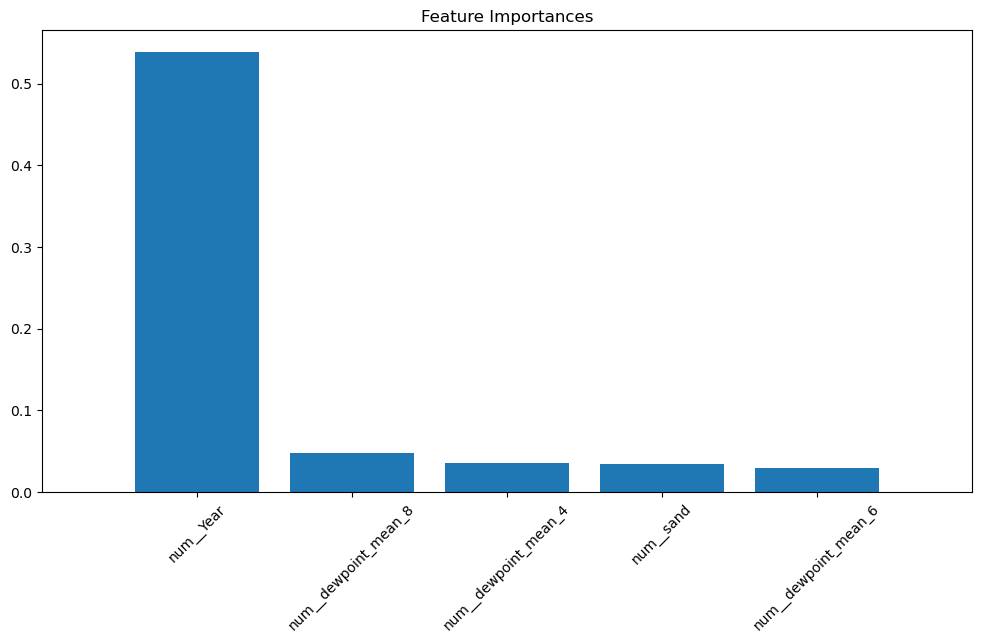

In [70]:
importances = best_rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()
indices = np.argsort(importances)[-5:][::-1]    
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(5), importances[indices], align="center")
plt.xticks(range(5), feature_names[indices], rotation=45)
plt.xlim([-1, 5])
plt.show()

In [71]:
# Get year training data, convert back to original scale
year_index = feature_names.tolist().index('num__Year')
X_train_year = X_train[:, year_index]
X_train_year_orig = X_train_year * preprocessor.named_transformers_['num'].scale_[numeric_features.get_loc('Year')] + preprocessor.named_transformers_['num'].mean_[numeric_features.get_loc('Year')]
X_train_year_orig

array([2012., 1993., 2005., ..., 1995., 2005., 2016.])

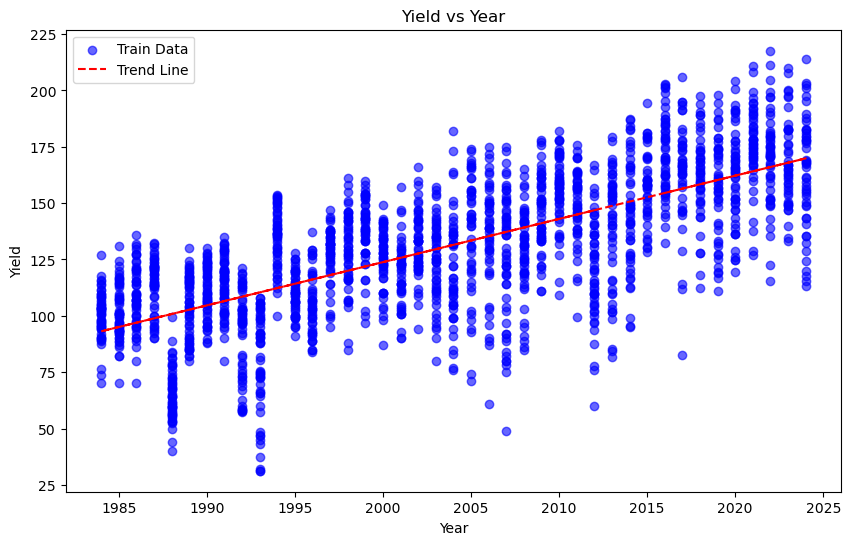

In [72]:
# Scatter plot showing linearity of yield by year
plt.figure(figsize=(10, 6))
plt.scatter(X_train_year_orig, y_train, color='blue', label='Train Data', alpha=0.6)
# Plot trend line
z = np.polyfit(X_train_year_orig, y_train, 1)
p = np.poly1d(z)
plt.plot(X_train_year_orig, p(X_train_year_orig), "r--", label='Trend Line')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.title('Yield vs Year')
plt.legend()
plt.show()

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Train Mean Squared Error: 26.043087005615234
Validation Mean Squared Error: 154.521240234375
Train Mean Absolute Error: 3.862199417051513
Validation Mean Absolute Error: 9.568142474896328
R^2 Score: 0.8439092917115714


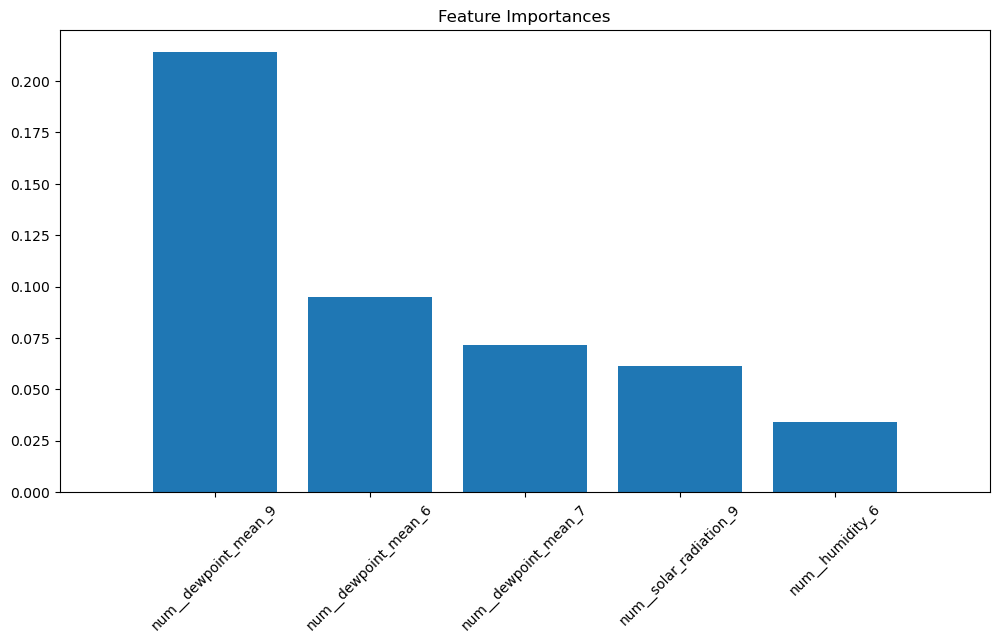

In [73]:
## Preprocessing
df = pd.read_csv('wide_data.csv')
df = df.dropna().drop(columns=['County', 'Year'])
X = df.drop(columns=['Yield'])
y = df['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
# Random Forest
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
train_mse = nn.MSELoss()(torch.tensor(y_train.values, dtype=torch.float32), torch.tensor(best_rf.predict(X_train), dtype=torch.float32)).item()
mse = nn.MSELoss()(torch.tensor(y_test.values, dtype=torch.float32), torch.tensor(y_pred, dtype=torch.float32)).item()
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Train Mean Squared Error: {train_mse}')
print(f'Validation Mean Squared Error: {mse}')
print(f'Train Mean Absolute Error: {mean_absolute_error(y_train, best_rf.predict(X_train))}')
print(f'Validation Mean Absolute Error: {mae}')
print(f'R^2 Score: {r2}')   
importances = best_rf.feature_importances_
feature_names = preprocessor.get_feature_names_out()
indices = np.argsort(importances)[-5:][::-1]    
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(5), importances[indices], align="center")
plt.xticks(range(5), feature_names[indices], rotation=45)
plt.xlim([-1, 5])
plt.show()

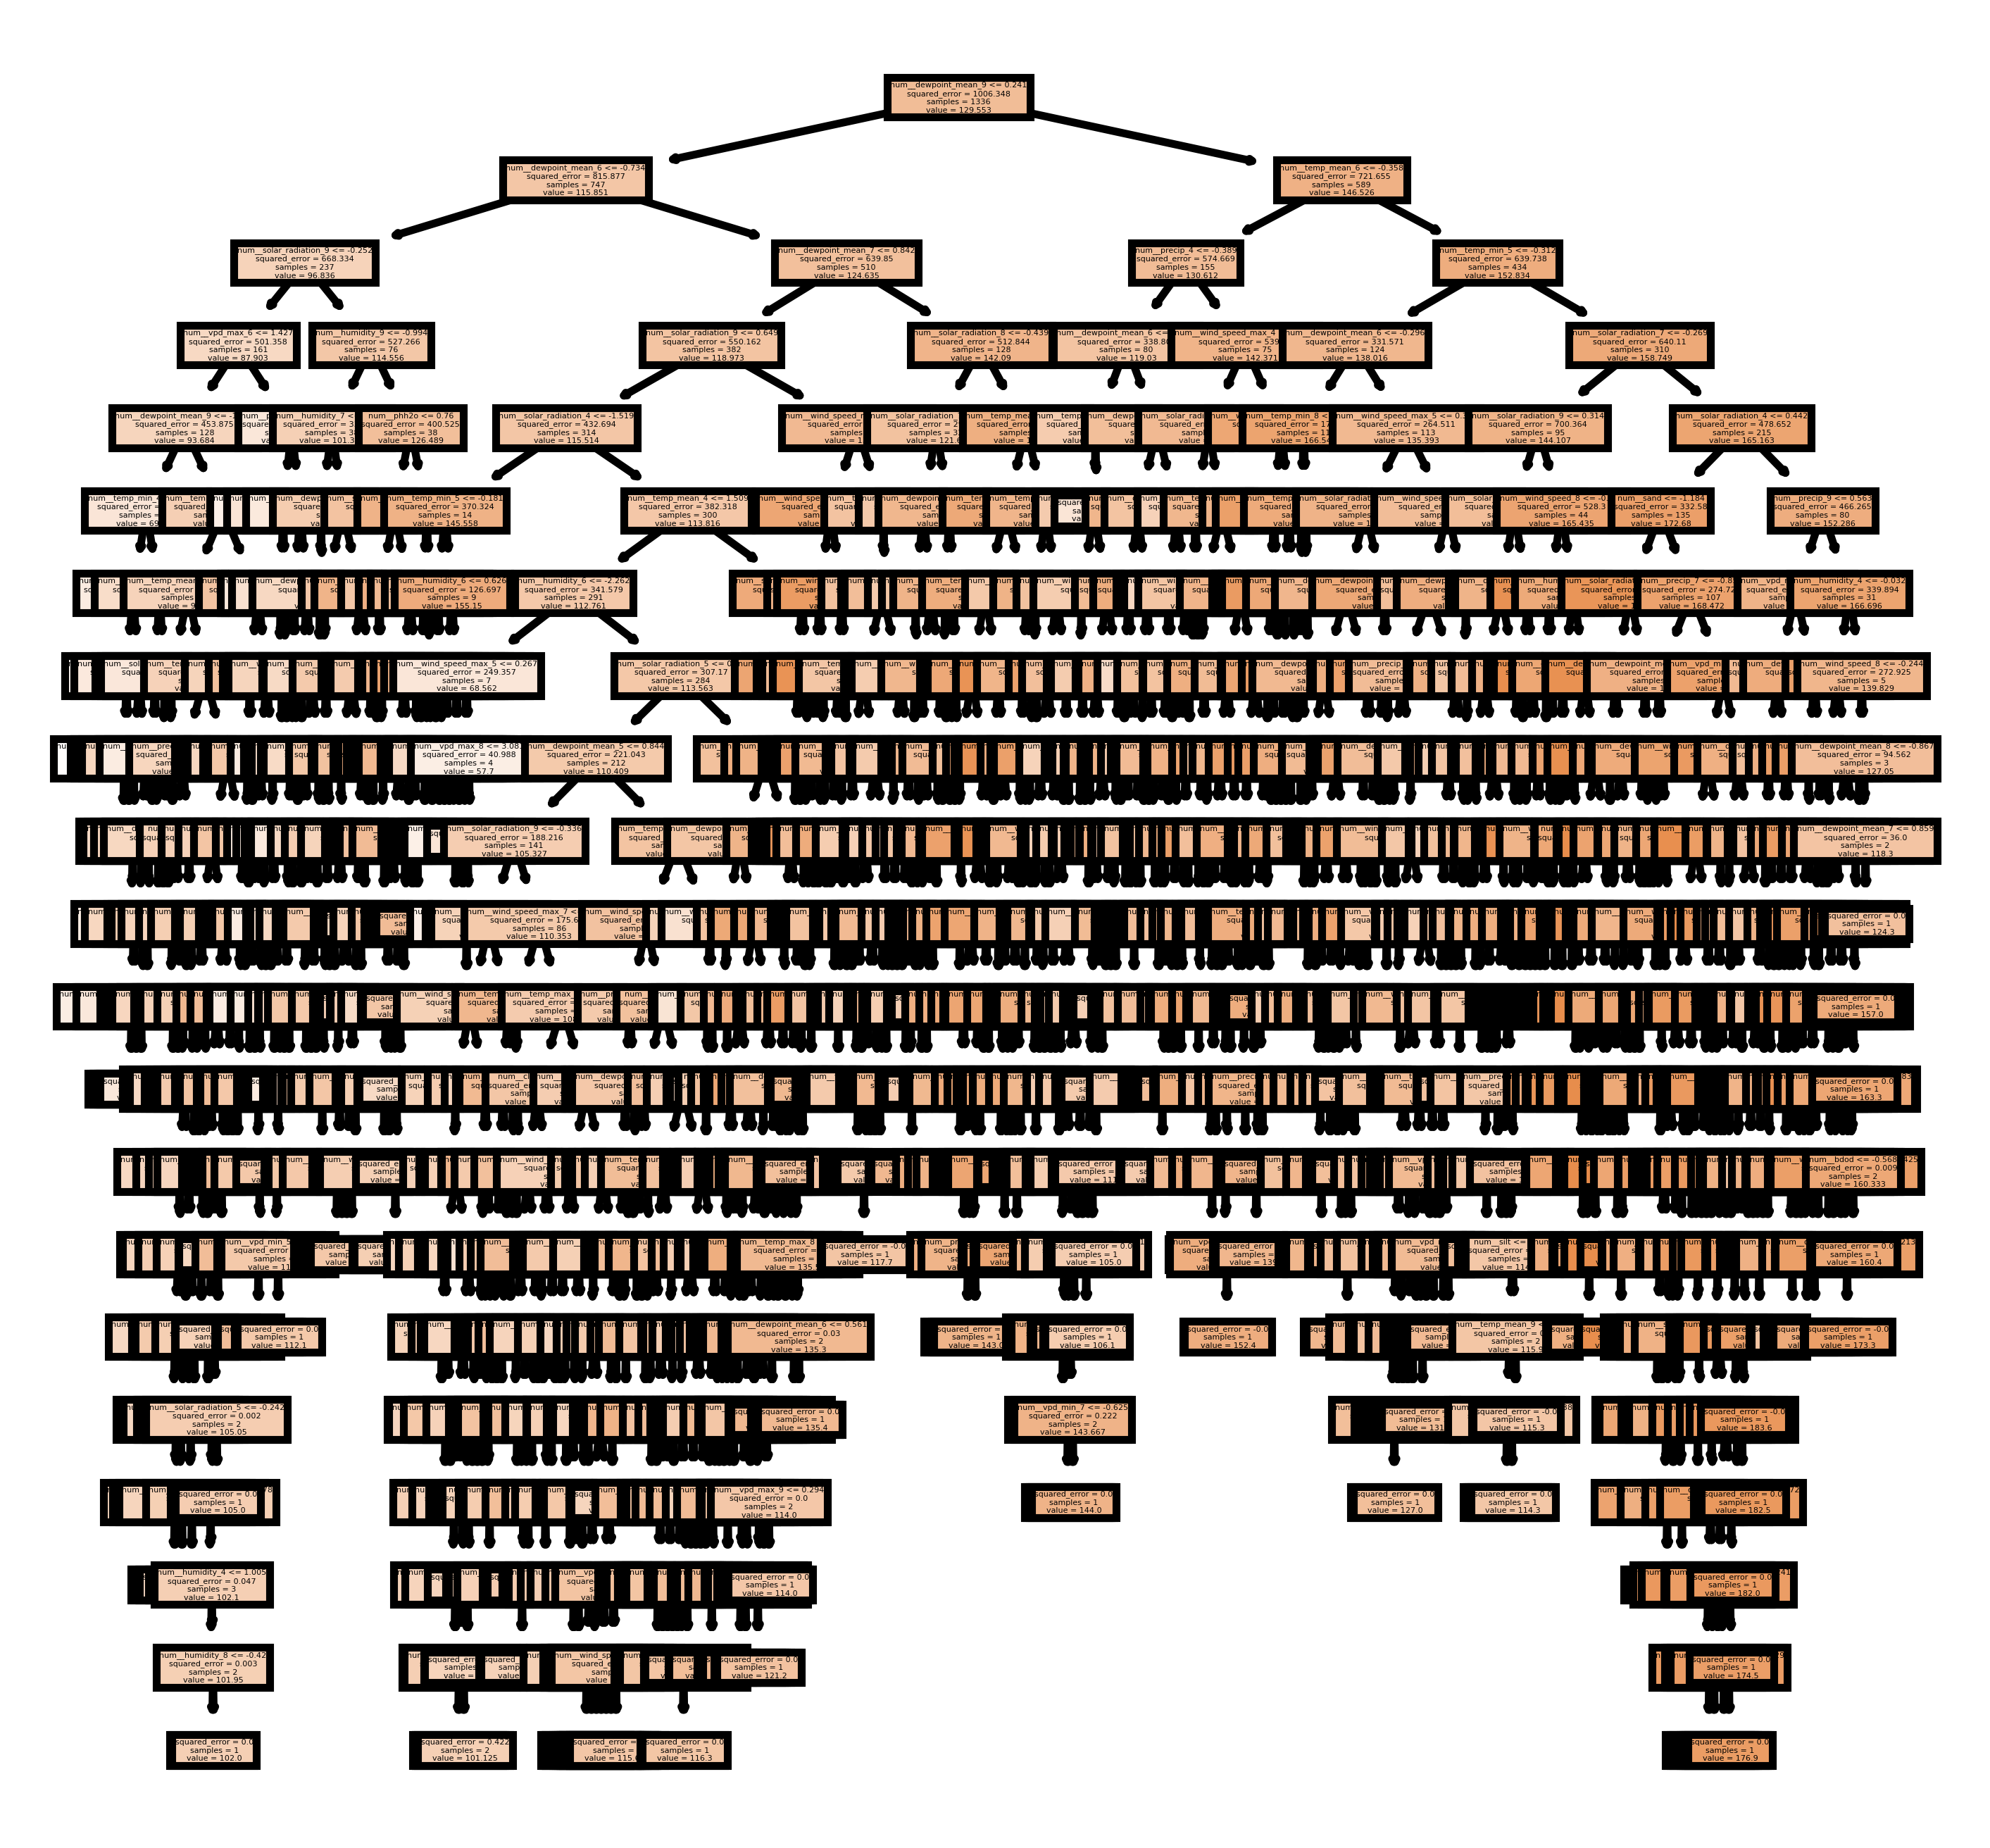

In [74]:
fn = list(preprocessor.get_feature_names_out())
cn = ['Yield']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
plot_tree(best_rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);
##fig.savefig('rf_individualtree.png')

In [75]:
import IPython.display as display
s_tree = export_graphviz(best_rf.estimators_[0],
                feature_names=fn,
                filled=True,
                rounded=True)
display.display(s_tree)

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="num__dewpoint_mean_9 <= 0.241\\nsquared_error = 1006.348\\nsamples = 1336\\nvalue = 129.553", fillcolor="#f1bd97"] ;\n1 [label="num__dewpoint_mean_6 <= -0.734\\nsquared_error = 815.877\\nsamples = 747\\nvalue = 115.851", fillcolor="#f3c6a6"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="num__solar_radiation_9 <= -0.252\\nsquared_error = 668.334\\nsamples = 237\\nvalue = 96.836", fillcolor="#f6d3ba"] ;\n1 -> 2 ;\n3 [label="num__vpd_max_6 <= 1.427\\nsquared_error = 501.358\\nsamples = 161\\nvalue = 87.903", fillcolor="#f7d9c3"] ;\n2 -> 3 ;\n4 [label="num__dewpoint_mean_9 <= -1.667\\nsquared_error = 453.875\\nsamples = 128\\nvalue = 93.684", fillcolor="#f6d5bd"] ;\n3 -> 4 ;\n5 [label="num__temp_min_4 <= -0.939\\nsquared_error = 245.255\\nsamples = 28\\nvalue = 69.665", fillcolor="#fae5d7"] ;\n4 -> 5 ;\n6 [label="num__vpd_